In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
data = pd.read_csv("full_data.csv")

In [4]:
data=data.rename(columns={'bert':'Nationalistic'})

<Axes: ylabel='Frequency'>

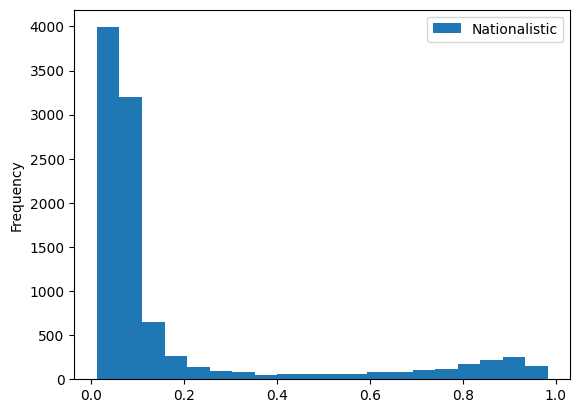

In [6]:
data.loc[:,['Nationalistic']].plot.hist(bins=20)

In [7]:
data.loc[:,['Nationalistic']].median()

Nationalistic    0.070309
dtype: float64

In [8]:
data.loc[:,['Nationalistic']].mean()

Nationalistic    0.178274
dtype: float64

In [9]:
data=data.rename(columns={'Nationalistic':'bert'})

In [32]:
data = data[data['date'] <= '2022-06-01']

<Axes: ylabel='Frequency'>

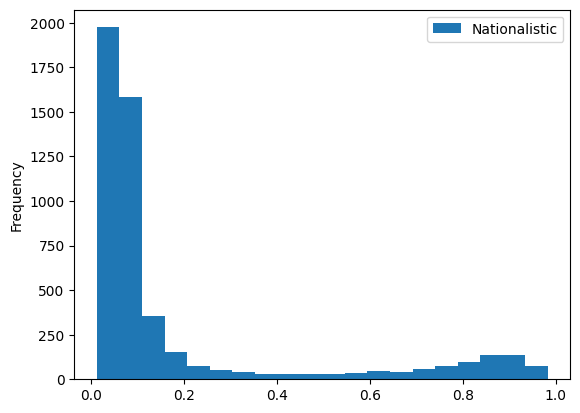

In [22]:
data=data.rename(columns={'bert':'Nationalistic'})
data.loc[:,['Nationalistic']].plot.hist(bins=20)

In [24]:
data

,date,user_id,IP in SH(1) or CQ(0),weibo_id,comment_content_process,Nationalistic
0,2022-02-01,6242457186,1,LdrCOrlJJ,人生 的 终极 意义 整点 薯条 🍟 组图 共 9 张 原图 赞 516 原文 转发 124...,0.055037
1,2022-02-01,6242457186,1,LduZeyRDS,抱歉 作者 已 设置 仅 展示 半年 内 微博 此 微博 已 不可 见 赞 0 原文 转发 ...,0.051570
2,2022-02-01,7295943862,1,LdvHy34MU,世界杯 我们 来 啦 祝贺 中国 女足 获 2023年 世界杯 资格 中国 女足 的 微博 ...,0.862392
3,2022-02-01,7295943862,1,Ldq2l2lYb,昨 与 今 国 与 家 大年初一 我们 银幕 相见 长津湖 之 水门桥 上映 奇迹 笨 小孩...,0.078267
4,2022-02-01,7295943862,1,LdnBckfnL,浅炫 一 碗 守岁 夜宵 并 深炫 一 把 新春 祝福 TFBOYS 王俊凯 的 微博 视频...,0.038502
...,...,...,...,...,...,...
5050,2022-06-01,1161362515,0,LvLazeIVF,美国 现代 奴隶制 国家 作为 世界 上 唯一 没有 签订 联合国 儿童 权利 公约 的 国...,0.875522
5051,2022-06-01,1161362515,0,LvKKxwxks,毛线 编织 技巧 雏菊花 桶 帽 钩编 教程 1 2 欢迎 集美们 一起 来 → → 玩 个...,0.088096
5052,2022-06-01,1161362515,0,LvKKtETHd,毛线 编织 技巧 菊花 桶 帽 2 2 欢迎 集美们 一起 来 → → 玩 个 毛线 cr ...,0.050262
5053,2022-06-01,1161362515,0,LvKfoxqGK,抱歉 作者 已 设置 仅 展示 半年 内 微博 此 微博 已 不可 见 赞 0 原文 转发 ...,0.060144


In [23]:
data.loc[:,['Nationalistic']].median()

Nationalistic    0.072386
dtype: float64

In [25]:
data.loc[:,['Nationalistic']].mean()

Nationalistic    0.189448
dtype: float64

In [27]:
data=data.rename(columns={'Nationalistic':'bert'})

## 5.1.	Post-level analysis

In [13]:
data_m_m=data.copy()

In [14]:
data_m_m['month']=data_m_m['date'].str[5:7]
data_m_m=data_m_m.loc[:, ["month","IP in SH(1) or CQ(0)","bert"]]
data_m_m=data_m_m.groupby(['month','IP in SH(1) or CQ(0)']).mean().reset_index()
data_m_m=data_m_m.set_index(['month','IP in SH(1) or CQ(0)']).unstack('IP in SH(1) or CQ(0)')
data_m_m['diff','1-0']=data_m_m.iloc[:,1]-data_m_m.iloc[:,0]
data_m_m=data_m_m.drop(['09'],axis=0)

In [15]:
data_m_m=data_m_m.droplevel(None, axis=1)
data_m_m=data_m_m.rename(columns={1:'Shanghai Nationalism Magnitude',0:'Chongqing Nationalism Magnitude','1-0':'Difference between Shanghai & Chongqing'})


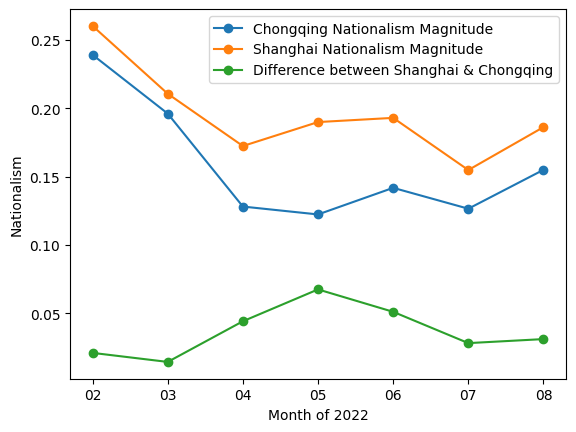

In [16]:
data_m_m.plot(marker='o')
plt.ylabel('Nationalism')
plt.xlabel('Month of 2022')
plt.legend(['Chongqing Nationalism Magnitude', 'Shanghai Nationalism Magnitude','Difference between Shanghai & Chongqing'])


In [18]:
from statsmodels.formula.api import ols
import datetime as dt

data_m_d=data.loc[:, ["date","IP in SH(1) or CQ(0)","bert"]]
data_m_d = data_m_d[data_m_d['date'] <= '2022-06-01']
data_m_d['Before(0) or After(1)']=0
data_m_d.loc[data_m_d['date'] >= '2022-03-28','Before(0) or After(1)'] =1
data_m_d['date'] = pd.to_datetime(data_m_d['date'])
data_m_d['date']=data_m_d['date'].map(dt.datetime.toordinal)
data_m_d=data_m_d.rename(columns={'IP in SH(1) or CQ(0)':'IP',
                                  'bert':'Nationalistic','Before(0) or After(1)':'Lockdown'})
data_m_d = data_m_d[['IP', 'Lockdown', 'Nationalistic','date']]

In [20]:
ols1 = ols('Nationalistic ~ IP + Lockdown + IP*Lockdown + date', data=data_m_d).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:          Nationalistic   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     29.81
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.50e-24
Time:                        22:46:41   Log-Likelihood:                -367.70
No. Observations:                5055   AIC:                             745.4
Df Residuals:                    5050   BIC:                             778.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      20.4425    150.321      0.136      

## 5.2.	Individual-level analysis

### 5.2.1.	Continuous labelling

In [29]:
# mean()

from statsmodels.formula.api import ols
data_u_d=data.loc[:, ["date",'user_id',"IP in SH(1) or CQ(0)","bert"]]
data_u_d=data_u_d.groupby(['date','IP in SH(1) or CQ(0)',"user_id"]).mean().reset_index()
data_u_d = data_u_d[data_u_d['date'] <= '2022-06-01']
data_u_d['Before(0) or After(1)']=0

data_u_d.loc[data_u_d['date'] >= '2022-03-28','Before(0) or After(1)'] =1

import datetime as dt
data_u_d['date'] = pd.to_datetime(data_u_d['date'])
data_u_d['date']=data_u_d['date'].map(dt.datetime.toordinal)
data_u_d=data_u_d.drop(['user_id'],axis=1)
data_u_d=data_u_d.loc[:, ["date","IP in SH(1) or CQ(0)",'Before(0) or After(1)',"bert"]]
data_u_d=data_u_d.rename(columns={'IP in SH(1) or CQ(0)':'IP',
                                  'bert':'Nationalistic','Before(0) or After(1)':'Lockdown'})

ols2 = ols('Nationalistic ~ IP + Lockdown + IP*Lockdown+ date', data=data_u_d).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:          Nationalistic   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.453
Date:                Tue, 09 May 2023   Prob (F-statistic):           5.94e-06
Time:                        23:51:16   Log-Likelihood:                 176.49
No. Observations:                1815   AIC:                            -343.0
Df Residuals:                    1810   BIC:                            -315.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -121.5846    215.568     -0.564      

In [30]:
# sum()

from statsmodels.formula.api import ols
data_u_d=data.loc[:, ["date",'user_id',"IP in SH(1) or CQ(0)","bert"]]
data_u_d=data_u_d.groupby(['date','IP in SH(1) or CQ(0)',"user_id"]).sum().reset_index()
data_u_d = data_u_d[data_u_d['date'] <= '2022-06-01']
data_u_d['Before(0) or After(1)']=0

data_u_d.loc[data_u_d['date'] >= '2022-03-28','Before(0) or After(1)'] =1

import datetime as dt
data_u_d['date'] = pd.to_datetime(data_u_d['date'])
data_u_d['date']=data_u_d['date'].map(dt.datetime.toordinal)
data_u_d=data_u_d.drop(['user_id'],axis=1)
data_u_d=data_u_d.loc[:, ["date","IP in SH(1) or CQ(0)",'Before(0) or After(1)',"bert"]]
data_u_d=data_u_d.rename(columns={'IP in SH(1) or CQ(0)':'IP',
                                  'bert':'Nationalistic','Before(0) or After(1)':'Lockdown'})

ols3 = ols('Nationalistic ~ IP + Lockdown + IP*Lockdown+ date', data=data_u_d).fit()
print(ols3.summary())

                            OLS Regression Results                            
Dep. Variable:          Nationalistic   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.880
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0216
Time:                        23:52:18   Log-Likelihood:                -2507.3
No. Observations:                1815   AIC:                             5025.
Df Residuals:                    1810   BIC:                             5052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1196.8501    945.729     -1.266      

### 5.2.2.	Binary labeling

In [33]:
len(data[data["bert"]>=0.189448])

1031

In [34]:
len(data[data["bert"]<0.189448])

4024

In [39]:
# sum -> post number
data_u_d=data.loc[:, ["date",'user_id',"IP in SH(1) or CQ(0)","bert"]]
data_u_d['bert'] = np.where( ( data_u_d['bert'] >= 0.189448 ), 1, 0)

data_u_d=data_u_d.groupby(['date','IP in SH(1) or CQ(0)',"user_id"]).sum().reset_index()
data_u_d = data_u_d[data_u_d['date'] <= '2022-06-01']
data_u_d['Before(0) or After(1)']=0

data_u_d.loc[data_u_d['date'] >= '2022-03-28','Before(0) or After(1)'] =1

import datetime as dt
data_u_d['date'] = pd.to_datetime(data_u_d['date'])
data_u_d['date']=data_u_d['date'].map(dt.datetime.toordinal)
data_u_d=data_u_d.drop(['user_id'],axis=1)
data_u_d=data_u_d.loc[:, ["date","IP in SH(1) or CQ(0)",'Before(0) or After(1)',"bert"]]
data_u_d=data_u_d.rename(columns={'IP in SH(1) or CQ(0)':'IP',
                                  'bert':'Nationalistic','Before(0) or After(1)':'Lockdown'})
data_u_d

,date,IP,Lockdown,Nationalistic
0,738187,1,0,0
1,738187,1,0,0
2,738187,1,0,1
3,738188,0,0,1
4,738188,0,0,1
...,...,...,...,...
1810,738307,1,1,0
1811,738307,1,1,1
1812,738307,1,1,8
1813,738307,1,1,0


In [40]:
ols4 = ols('Nationalistic ~ IP + Lockdown + IP*Lockdown+ date', data=data_u_d).fit()
print(ols4.summary())

                            OLS Regression Results                            
Dep. Variable:          Nationalistic   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.555
Date:                Wed, 10 May 2023   Prob (F-statistic):            0.00676
Time:                        11:14:46   Log-Likelihood:                -3050.9
No. Observations:                1815   AIC:                             6112.
Df Residuals:                    1810   BIC:                             6139.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1381.9306   1275.990     -1.083      

In [41]:
# mean -> frequency
data_u_d=data.loc[:, ["date",'user_id',"IP in SH(1) or CQ(0)","bert"]]
data_u_d['bert'] = np.where( ( data_u_d['bert'] >= 0.189448 ), 1, 0)

data_u_d=data_u_d.groupby(['date','IP in SH(1) or CQ(0)',"user_id"]).mean().reset_index()
data_u_d = data_u_d[data_u_d['date'] <= '2022-06-01']
data_u_d['Before(0) or After(1)']=0

data_u_d.loc[data_u_d['date'] >= '2022-03-28','Before(0) or After(1)'] =1

import datetime as dt
data_u_d['date'] = pd.to_datetime(data_u_d['date'])
data_u_d['date']=data_u_d['date'].map(dt.datetime.toordinal)
data_u_d=data_u_d.drop(['user_id'],axis=1)
data_u_d=data_u_d.loc[:, ["date","IP in SH(1) or CQ(0)",'Before(0) or After(1)',"bert"]]
data_u_d=data_u_d.rename(columns={'IP in SH(1) or CQ(0)':'IP',
                                  'bert':'Nationalistic','Before(0) or After(1)':'Lockdown'})
data_u_d

,date,IP,Lockdown,Nationalistic
0,738187,1,0,0.000000
1,738187,1,0,0.000000
2,738187,1,0,0.333333
3,738188,0,0,0.500000
4,738188,0,0,0.500000
...,...,...,...,...
1810,738307,1,1,0.000000
1811,738307,1,1,0.500000
1812,738307,1,1,0.888889
1813,738307,1,1,0.000000


In [42]:
ols5 = ols('Nationalistic ~ IP + Lockdown + IP*Lockdown+ date', data=data_u_d).fit()
print(ols5.summary())

                            OLS Regression Results                            
Dep. Variable:          Nationalistic   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.631
Date:                Wed, 10 May 2023   Prob (F-statistic):           0.000167
Time:                        11:15:02   Log-Likelihood:                -578.77
No. Observations:                1815   AIC:                             1168.
Df Residuals:                    1810   BIC:                             1195.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -234.1998    326.816     -0.717      